In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


In [2]:
df = pd.read_csv("original_data.csv")

In [3]:
df.head()

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,Dalc,Walc,health,absences,G1,G2,G3,subject,Pass,Parents_edu
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,1,1,3,5,5,6,6,Maths,False,4
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,1,1,3,3,5,5,6,Maths,False,1
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,2,3,3,7,7,8,10,Maths,True,1
3,3,GP,F,15,U,GT3,T,4,2,health,...,1,1,5,1,15,14,15,Maths,True,4
4,4,GP,F,16,U,GT3,T,3,3,other,...,1,2,5,3,6,10,10,Maths,True,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   991 non-null    int64 
 1   school       991 non-null    object
 2   sex          991 non-null    object
 3   age          991 non-null    int64 
 4   address      991 non-null    object
 5   famsize      991 non-null    object
 6   Pstatus      991 non-null    object
 7   Medu         991 non-null    int64 
 8   Fedu         991 non-null    int64 
 9   Mjob         991 non-null    object
 10  Fjob         991 non-null    object
 11  reason       991 non-null    object
 12  guardian     991 non-null    object
 13  traveltime   991 non-null    int64 
 14  studytime    991 non-null    int64 
 15  failures     991 non-null    int64 
 16  schoolsup    991 non-null    object
 17  famsup       991 non-null    object
 18  paid         991 non-null    object
 19  activities   991 non-null    

In [5]:
df2 = pd.read_csv("CompleteDataAndBiases.csv")

In [6]:
df2.head()

,index,ParticipantID,name,sex,studytime,freetime,romantic,Walc,goout,Parents_edu,absences,reason,G3,Pass,PredictedGrade,PredictedRank,StereotypeActivation,Predicted_Pass_PassFailStrategy,Predicted_Pass_RankingStrategy
0,132,1,Anna,F,1,2,no,1,2,4,0,course,15,True,17,4,NaN,True,True
1,724,1,Michael,M,1,1,no,4,4,4,1,reputation,11,True,10,7,NaN,True,False
2,637,1,David,M,1,2,no,4,2,2,0,other,11,True,13,6,NaN,True,True
3,884,1,Brian,M,1,1,no,4,4,3,7,home,9,False,10,8,NaN,True,False
4,194,1,Jenny,F,2,2,no,1,4,2,0,reputation,14,True,18,3,NaN,True,True


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   index                            856 non-null    int64 
 1   ParticipantID                    856 non-null    int64 
 2   name                             856 non-null    object
 3   sex                              856 non-null    object
 4   studytime                        856 non-null    int64 
 5   freetime                         856 non-null    int64 
 6   romantic                         856 non-null    object
 7   Walc                             856 non-null    int64 
 8   goout                            856 non-null    int64 
 9   Parents_edu                      856 non-null    int64 
 10  absences                         856 non-null    int64 
 11  reason                           856 non-null    object
 12  G3                               856

In [11]:
le = preprocessing.LabelEncoder()
cols = ['name', 'sex', 'romantic', 'StereotypeActivation', 'reason']

for col in cols:
    df2[col] = le.fit_transform(df2[col])
    print(le.classes_)

df2.head()

[0 1 2 3 4 5 6 7]
[0 1]
[0 1]
[0 1 2]
[0 1 2 3]


,index,ParticipantID,name,sex,studytime,freetime,romantic,Walc,goout,Parents_edu,absences,reason,G3,Pass,PredictedGrade,PredictedRank,StereotypeActivation,Predicted_Pass_PassFailStrategy,Predicted_Pass_RankingStrategy
0,132,1,0,0,1,2,0,1,2,4,0,0,15,True,17,4,2,True,True
1,724,1,5,1,1,1,0,4,4,4,1,3,11,True,10,7,2,True,False
2,637,1,2,1,1,2,0,4,2,2,0,2,11,True,13,6,2,True,True
3,884,1,1,1,1,1,0,4,4,3,7,1,9,False,10,8,2,True,False
4,194,1,3,0,2,2,0,1,4,2,0,3,14,True,18,3,2,True,True


In [16]:
df2['StereotypeActivation'].isna().value_counts()

StereotypeActivation
False    856
Name: count, dtype: int64

In [17]:
df2.corr()

,index,ParticipantID,name,sex,studytime,freetime,romantic,Walc,goout,Parents_edu,absences,reason,G3,Pass,PredictedGrade,PredictedRank,StereotypeActivation,Predicted_Pass_PassFailStrategy,Predicted_Pass_RankingStrategy
index,1.000000,-1.900709e-03,-5.188637e-03,-9.984986e-02,-0.076182,-0.054566,0.134525,0.035667,0.081411,-0.198451,-0.121366,-0.104429,0.056929,0.070655,-0.023431,-1.028159e-02,-7.354916e-02,-0.006252,0.042024
ParticipantID,-0.001901,1.000000e+00,3.028439e-16,-5.737730e-16,0.042662,-0.043319,-0.023354,-0.060827,-0.028419,-0.043340,0.016780,0.048862,-0.009273,-0.015761,-0.002761,-1.168389e-15,-3.977042e-02,-0.002655,-0.013977
name,-0.005189,3.028439e-16,1.000000e+00,-8.604000e-18,0.060366,-0.080715,0.015633,-0.052416,-0.015115,-0.002698,-0.009011,-0.029537,0.009669,0.004706,0.030233,-4.005340e-02,-1.037312e-16,0.033228,0.022740
sex,-0.099850,-5.737730e-16,-8.604000e-18,1.000000e+00,-0.250442,0.153738,-0.096344,0.264120,0.031484,0.100033,0.033709,-0.038672,-0.061230,-0.046216,-0.217130,2.620654e-01,-1.606376e-17,-0.187410,-0.188563
studytime,-0.076182,4.266163e-02,6.036606e-02,-2.504420e-01,1.000000,-0.058031,0.085665,-0.246434,-0.049138,0.109981,-0.102106,0.148756,0.217462,0.121377,0.400094,-4.175617e-01,2.294920e-02,0.273819,0.333103
freetime,-0.054566,-4.331861e-02,-8.071540e-02,1.537380e-01,-0.058031,1.000000,-0.012894,0.096659,0.265033,-0.017682,0.009487,-0.043393,-0.090591,-0.066929,-0.046170,4.749919e-02,-3.372824e-02,-0.060361,-0.051437
romantic,0.134525,-2.335437e-02,1.563320e-02,-9.634389e-02,0.085665,-0.012894,1.000000,-0.002194,-0.006431,-0.004273,0.097496,-0.028713,-0.016097,-0.030590,-0.022074,-5.929835e-03,3.965336e-02,-0.022324,0.020373
Walc,0.035667,-6.082658e-02,-5.241597e-02,2.641205e-01,-0.246434,0.096659,-0.002194,1.000000,0.382079,-0.014878,0.188359,0.000723,-0.228608,-0.128019,-0.361354,3.943160e-01,3.309162e-02,-0.276663,-0.309849
goout,0.081411,-2.841923e-02,-1.511495e-02,3.148427e-02,-0.049138,0.265033,-0.006431,0.382079,1.000000,0.008208,0.137592,-0.017389,-0.145244,-0.135158,-0.185986,1.717608e-01,2.734010e-02,-0.139613,-0.156993
Parents_edu,-0.198451,-4.334004e-02,-2.697956e-03,1.000327e-01,0.109981,-0.017682,-0.004273,-0.014878,0.008208,1.000000,0.031337,0.098823,0.223816,0.086682,0.153487,-1.425011e-01,-2.154623e-02,0.076562,0.108679


TypeError: Image data of dtype object cannot be converted to float

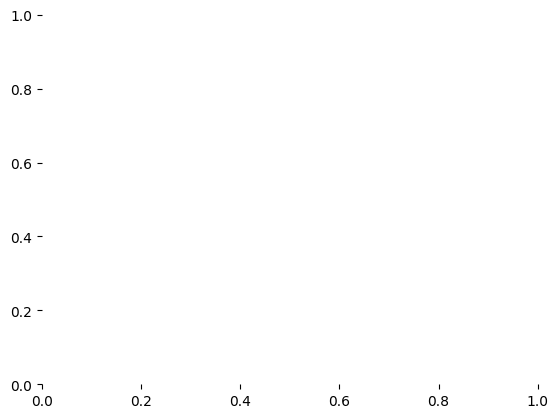

In [20]:
sns.heatmap(data=df2)

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   index                            856 non-null    int64
 1   ParticipantID                    856 non-null    int64
 2   name                             856 non-null    int64
 3   sex                              856 non-null    int64
 4   studytime                        856 non-null    int64
 5   freetime                         856 non-null    int64
 6   romantic                         856 non-null    int64
 7   Walc                             856 non-null    int64
 8   goout                            856 non-null    int64
 9   Parents_edu                      856 non-null    int64
 10  absences                         856 non-null    int64
 11  reason                           856 non-null    int64
 12  G3                               856 non-null    i

In [23]:
df3 = df2.drop(columns=['Predicted_Pass_RankingStrategy', 'Predicted_Pass_PassFailStrategy', 'Pass'])

In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   index                 856 non-null    int64
 1   ParticipantID         856 non-null    int64
 2   name                  856 non-null    int64
 3   sex                   856 non-null    int64
 4   studytime             856 non-null    int64
 5   freetime              856 non-null    int64
 6   romantic              856 non-null    int64
 7   Walc                  856 non-null    int64
 8   goout                 856 non-null    int64
 9   Parents_edu           856 non-null    int64
 10  absences              856 non-null    int64
 11  reason                856 non-null    int64
 12  G3                    856 non-null    int64
 13  PredictedGrade        856 non-null    int64
 14  PredictedRank         856 non-null    int64
 15  StereotypeActivation  856 non-null    int64
dtypes: int64

In [30]:
df3.corr()

,index,ParticipantID,name,sex,studytime,freetime,romantic,Walc,goout,Parents_edu,absences,reason,G3,PredictedGrade,PredictedRank,StereotypeActivation
index,1.000000,-1.900709e-03,-5.188637e-03,-9.984986e-02,-0.076182,-0.054566,0.134525,0.035667,0.081411,-0.198451,-0.121366,-0.104429,0.056929,-0.023431,-1.028159e-02,-7.354916e-02
ParticipantID,-0.001901,1.000000e+00,3.028439e-16,-5.737730e-16,0.042662,-0.043319,-0.023354,-0.060827,-0.028419,-0.043340,0.016780,0.048862,-0.009273,-0.002761,-1.168389e-15,-3.977042e-02
name,-0.005189,3.028439e-16,1.000000e+00,-8.604000e-18,0.060366,-0.080715,0.015633,-0.052416,-0.015115,-0.002698,-0.009011,-0.029537,0.009669,0.030233,-4.005340e-02,-1.037312e-16
sex,-0.099850,-5.737730e-16,-8.604000e-18,1.000000e+00,-0.250442,0.153738,-0.096344,0.264120,0.031484,0.100033,0.033709,-0.038672,-0.061230,-0.217130,2.620654e-01,-1.606376e-17
studytime,-0.076182,4.266163e-02,6.036606e-02,-2.504420e-01,1.000000,-0.058031,0.085665,-0.246434,-0.049138,0.109981,-0.102106,0.148756,0.217462,0.400094,-4.175617e-01,2.294920e-02
freetime,-0.054566,-4.331861e-02,-8.071540e-02,1.537380e-01,-0.058031,1.000000,-0.012894,0.096659,0.265033,-0.017682,0.009487,-0.043393,-0.090591,-0.046170,4.749919e-02,-3.372824e-02
romantic,0.134525,-2.335437e-02,1.563320e-02,-9.634389e-02,0.085665,-0.012894,1.000000,-0.002194,-0.006431,-0.004273,0.097496,-0.028713,-0.016097,-0.022074,-5.929835e-03,3.965336e-02
Walc,0.035667,-6.082658e-02,-5.241597e-02,2.641205e-01,-0.246434,0.096659,-0.002194,1.000000,0.382079,-0.014878,0.188359,0.000723,-0.228608,-0.361354,3.943160e-01,3.309162e-02
goout,0.081411,-2.841923e-02,-1.511495e-02,3.148427e-02,-0.049138,0.265033,-0.006431,0.382079,1.000000,0.008208,0.137592,-0.017389,-0.145244,-0.185986,1.717608e-01,2.734010e-02
Parents_edu,-0.198451,-4.334004e-02,-2.697956e-03,1.000327e-01,0.109981,-0.017682,-0.004273,-0.014878,0.008208,1.000000,0.031337,0.098823,0.223816,0.153487,-1.425011e-01,-2.154623e-02


<Axes: >

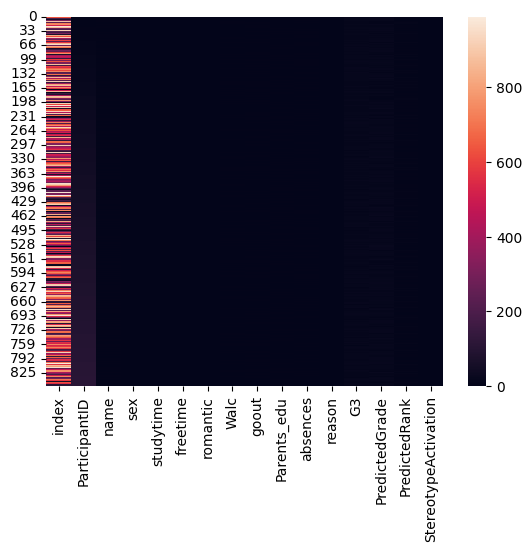

In [31]:
sns.heatmap(data=df3)